###Instruction
 - There are 8 problems. 100 Points each. The full score is 720.
 - Work in your notebook.
 - You may show your work on a separate sheet of A4. I'll also check there for partial credit. If you just give you answer without justification and it's wrong I can't give you any partial credit.
 - You may ask me for python syntax or matplotlib question. But, you know you can use shift-tab or ? for documentation.
 - Make sure your code works in order doing Kernel-->restart and then Cell--> Run All. Make sure what appears in the ouput is what you expect

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

###Problem 1)(100) 25 each.

1.1) Find first 3 **non-zero** terms taylor series expansion of
$$ f(x) = \sqrt{1+x} $$ around $x=0$.

1.2) Use the taylor series above to estimate $$\sqrt{0.9}$$.

1.3) What is the bound on **truncation error** for the estimate you got in 1.2)?

1.4) How many **non-zero** terms do I need such that the bound **truncation error** is less than $10^{-7}$?

Hint: Try doing a couple derivative and you will see the patterns.

### Problem 2) (100)

2.1) Use bisection method to find **all solutions** of

$$ 2e^{-0.1x}\sin(x) = 0.55 $$

for $x>0$. See pic below.

Make sure your answers are at most $10^{-4}$ away from the actual solution.

0.2869873046875
2.77032470703125
6.860809326171875
8.708038330078125


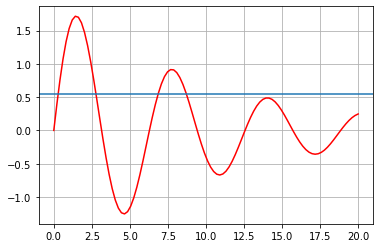

In [4]:
def f(x):
    return 2*math.exp(-0.1*x)*math.sin(x)
x = np.linspace(0,20,100)
fx = [f(xx) for xx in x]
plt.plot(x,fx, 'r')
plt.axhline(0.55)
plt.grid()

def bis_f(x):
    return 2*math.exp(-0.1*x)*math.sin(x)-0.55

def bisection(f, a, b, acc):
    if f(a)*f(b) > 0:
        print("No root found.")
    else:
        while (b - a)/2 > acc:
            midpoint = (a + b)/2
            if f(midpoint) == 0:
                return(midpoint) 
            elif f(a)*f(midpoint) < 0:
                b = midpoint
            else:
                a = midpoint
        return (midpoint)
    

print(bisection(bis_f, 0, 2, 1e-4))
print(bisection(bis_f, 2, 5, 1e-4))
print(bisection(bis_f, 5, 7.5, 1e-4))
print(bisection(bis_f, 7.5, 10, 1e-4))

###Problem 3) (100)

3.1) (90 points) Use Newton's method to find intersection of the following two lines.

$$f(x) = e^x -1.5$$

$$g(x) = x + \sin(x)$$

Any **decent** result from Newton's method will get your full credit. You **must** use Newton's method. No credit will be given to any other method. 

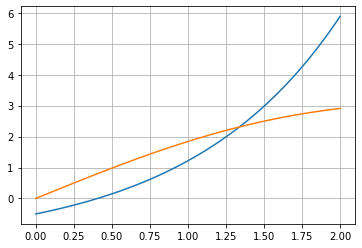

In [6]:
def f(x):
    return math.exp(x) - 1.5
def g(x):
    return x + math.sin(x)
x = np.linspace(0,2,100)
fx = [f(xx) for xx in x]
gx = [g(xx) for xx in x]
plt.plot(x,fx)
plt.plot(x,gx)
plt.grid()

In [7]:
def new_func(x):
    return f(x) - g(x)

def center_diff(f, x, h):
    return((f(x+h) - f(x-h))/ (2*h))

def newton(f, start, n):
    for z in range(n):
        x_next = start - (f(start)/ center_diff(f, start, 0.05))
        start = x_next
    return start

print(newton(new_func, 1.5, 100))

1.3378496477902477


3.2)(5 Points) Which method converge faster: Newton's Method or bisection?

3.3) (5 Points) Does Newton's method guarantee to convege to the real answer?

### Problem 4)  (100)

4.1)(35 points) Show that

$$f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} + O(h^2)$$

4.2)(35 points) Let
$$f(x) = \sin(x^2)$$
Plot for $x \in [0,2\pi]$ the following lines

1. $f(x)$
2. $f'(x)$ caculated numerically using central difference method
3. $f''(x)$ calculated numerically

Pick appropriate value for $h$. Analytical answers will not be accepted.

4.3)(30 points) Plot polynomial of **degree 3** that passes through the following four points.
$$(0.1, 3), (0.2,1), (0.5, -1), (1, 1) $$

Make sure your polynomial is of **degree 3**.

###Problem 5)  (100)

5.1) (70 points)Use trapezoid rule with 100 subdivision to find the following calculate the following integral.

$$ \int\limits_{x=1}^{x=2} \frac{1}{x} \; dx$$

5.2) (15 points)What is bound on **truncation error** for your answer in 3.1)

5.3) (15 points) How many subdivision do we need to make sure that our answer is at most $10^{-6}$ from the real answer?

### Problem 6) (100)

6.1) (70 points) An ice cream store record the temperature and number of ice cream sold on each day. The store have the following data. The store owner want to model the data with a straight line
$$ s = at + b$$
where $s$ is sale number and $t$ is temperature in celcius.

Find the slope and intercept of the best fitted line using least square method.

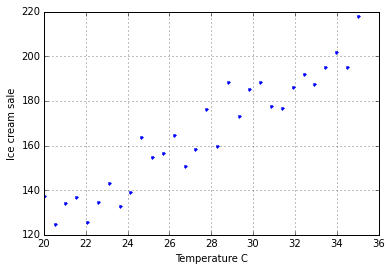

In [4]:
temperature = [ 20.        ,  20.51724138,  21.03448276,  21.55172414,
        22.06896552,  22.5862069 ,  23.10344828,  23.62068966,
        24.13793103,  24.65517241,  25.17241379,  25.68965517,
        26.20689655,  26.72413793,  27.24137931,  27.75862069,
        28.27586207,  28.79310345,  29.31034483,  29.82758621,
        30.34482759,  30.86206897,  31.37931034,  31.89655172,
        32.4137931 ,  32.93103448,  33.44827586,  33.96551724,
        34.48275862,  35.        ]
sale = [ 137.51785095,  124.64402538,  134.12166738,  136.9660818 ,
        125.79715671,  134.69878693,  143.17103597,  132.86731762,
        139.17234271,  163.95542568,  154.81626083,  156.57737534,
        164.53795806,  150.94106806,  158.46257369,  176.40478845,
        159.69716465,  188.52792981,  173.26043665,  185.19117472,
        188.23649894,  177.70904806,  176.95357726,  186.04751343,
        192.19480621,  187.55949344,  195.22922111,  201.86099821,
        195.35633724,  217.96614178]
plt.plot(temperature, sale, '.')
plt.ylabel('Ice cream sale')
plt.xlabel('Temperature C')
plt.grid()

6.2) (15 points)Plot the best fitted line along with the data points.

6.3) (15 points) If the temperature today is 30 degree, how many ice cream do we expect to sell?

###Problem 7) (100)

7) Find the area of the shaded region to a decent accuracy. 

The blue line is
$$f(x) = e^{-x}\sin(\pi x)$$
and the green line is
$$g(x) = 0.5 - \frac{x}{2.5}$$

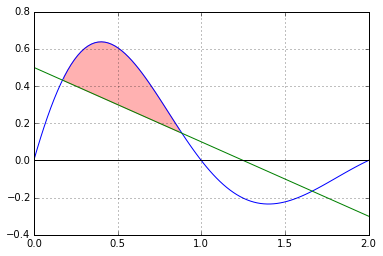

In [5]:
x = np.linspace(0,2,100)
def f(x):
    return math.exp(-x)*math.sin(math.pi*x)
def g(x):
    return 0.5-x/2.5
fx = np.array([f(xx) for xx in x])
gx = np.array([g(xx) for xx in x])
plt.plot(x,fx)
plt.plot(x,gx)
plt.grid()
plt.axhline(0,color='k')
plt.fill_between(x,fx,gx,where=((fx>gx) & (gx>0)), color='red', alpha=0.3)

###Problem 8)  (100)

8) Cheating Fourier Series. In the homework you have found that you can approximate the function using a bunch of sine and cosine and there is a way to find each of the coefficient by performing integrations.

Now we are going to achieve a similar effect **without** integration. We will use least square method instead.

Let us consider the triangular function shown below. We want to approximate this using a bunch of sines:

$$ \text{triangle}(x) \approx a \sin(\pi x) + b \sin(3 \pi x) + c \sin(5 \pi x) $$

**Find a, b, and c using least squre method. Plot your approximation along with triangular curve.**

Hint: This question is actually much easier than it looks. Figure out what is your data and what is your parameter.

Hint2: You may use `np.linalg.solve`. Type `?np.linalg.solve` for documentation. Scroll down for example. Also, `np.sin` and all those numpy broadcast operations will save countless number of lines from your code.

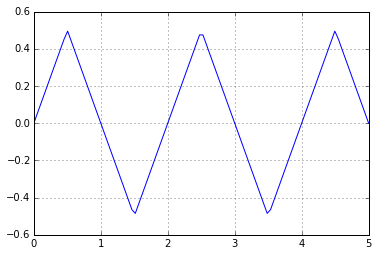

In [6]:
def triangle(x):
    t = x%2.0
    if t < 0.5: 
        return 1*t
    elif t < 1.5:
        return 1-t
    else:
        return t-2

x = np.linspace(0,5,100)
y = [triangle(xx) for xx in x]
plt.plot(x,y)
plt.grid()